# ЕГЭ 2017 Вариант 3 &nbsp; &nbsp; &nbsp; EGE 2017 Variant 3
[ЕГЭ-2017. Информатика.10 тренировочных вариантов. Ушаков Д.М.](https://drive.google.com/file/d/0B6696ckkWj_zS2ptblAxNERHZzQ/view)

[Basic Regular Expressions in R Cheatsheet](https://www.rstudio.com/wp-content/uploads/2016/09/RegExCheatsheet.pdf)

[DataFlair: R Tutorials](https://data-flair.training/blogs/category/r/)

[Алгоритм Шеннона — Фано](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A8%D0%B5%D0%BD%D0%BD%D0%BE%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%B0%D0%BD%D0%BE)

In [2]:
library(IRdisplay)
library(repr)
library(hash)
library(numbers)
library(e1071)
library(igraph)
library(VennDiagram)

In [3]:
# install.packages('')

In [4]:
answer_dictionary <- hash()

In [5]:
display_html("<style>
@import url('https://fonts.googleapis.com/css?family=Roboto');
body {background-color: aliceblue;} 
a {color: #4876ff; font-family: 'Roboto';} 
h1 {color: #348ABD; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: gray; font-family: 'Roboto'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #348ABD; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre, div.output_subarea {color: gray;}
div.input_prompt {color: #4876ff;}      
div.output_stderr pre {background-color: aliceblue;}  
div.output_stderr {background-color: gray;}                        
</style>")  

## Часть 1 &nbsp; &nbsp; &nbsp; Part 1

## 1.
Сколько единиц содержится в двоичной записи восьмеричного числа $2417_8$?

How many units are contained in the binary notation of the octal number $ 2417_8 $?

In [6]:
options(scipen = 999)
dec2bin <- function(n) {
  bv <- rep(0, 1 + floor(log(n, 2)))
  while (n >= 2) {
    pow <- floor(log(n, 2))
    bv[1 + pow] <- 1
    n <- n - 2^pow
  }
  bv[1] <- n %% 2
  paste(rev(bv), collapse = "")
}

In [7]:
# 2417 _8 = 1295 _10
2 * 8 ** 3 + 4 * 8 ** 2 + 1 * 8 ** 1 + 7 * 8 ** 0

[1] 1295

In [8]:
# 1295 _10 = 10100001111 _2
dec2bin(1295)

[1] "10100001111"

In [9]:
gsub("0","",dec2bin(1295))

[1] "111111"

In [10]:
nchar(gsub("0","",dec2bin(1295)))

[1] 6

Один разряд в восьмеричной записи соответствует трем разрядам в двоичной системе:

One digit in the octal system corresponds to three digits in the binary system:

$7 * 8^0 = 1 * 2^2 + 1 * 2^1 + 1 * 2^0$

$1 * 8^1 = 1 * 2^3$

$4 * 8^2 = 1 * 2^8$

$2 * 8^3 = 1 * 2^10$

Всего 6 ненулевых коэффициентов различных степеней основания системы 2.

There are 6 nonzero coefficients of different degrees of 2 (the binary system).

In [11]:
answer_dictionary[1] <- nchar(gsub("0","",dec2bin(2 * 8 ** 3 + 4 * 8 ** 2 + 
                                                  1 * 8 ** 1 + 7 * 8 ** 0)))

## 2.
Дан фрагмент таблицы истинности выражения F, зависящего от трех аргументов X, Y, Z.

Перечислите в порядке возрастания без запятых и пробелов номера логических выражений, которые соответствуют F.

---

The truth table fragment of the expression F, depending on three arguments X, Y, Z, is given.

List in ascending order without commas and spaces the numbers of logical expressions that correspond to F.

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |

$1) \ X \land Y \lor Z \\ 
2) \ \neg X \land \neg Y \lor \neg Z \\ 
3) \ ( X \lor Y ) \land \neg Z \\ 
4) \ ( X \lor Y ) \to Z \\ 
5) \ \neg X \lor \neg Y \lor Z$

| $X$ | $Y$ | $Z$ | $F$ |
|:-:|:-:|:-:|:-:|
| 0 | 0 | 0 | 1 |
| 1 | 1 | 0 | 0 |
| 0 | 1 | 1 | 1 |

$1) \ X \land Y \lor Z \\ 
2) \ \neg X \land \neg Y \lor \neg Z \\ 
3) \ ( X \lor Y ) \land \neg Z \\ 
4) \ ( X \lor Y ) \to Z \\ 
5) \ \neg X \lor \neg Y \lor Z$

In [20]:
bc <- matrix(c(0,0,0, 1,1,0, 0,1,1), nrow=3, ncol=3, byrow = TRUE)
x_implies_y <- function(x,y) {!x | y}

F <- function(X, Y, Z, I) {
    if (I == 1) {return(X & Y | Z)}
    if (I == 2) {return(!X & !Y | !Z)}
    if (I == 3) {return((X | Y) & !Z)}
    if (I == 4) {return(x_implies_y((X | Y),Z))}    
    if (I == 5) {return(!X | !Y | Z)}    
} 

In [21]:
for (i in 1:5){
    result = vector(length=3)
    for (j in 1:3) {result[j] = F(bc[j,1],bc[j,2],bc[j,3],i)}
    if (all(result == c(TRUE,FALSE,TRUE))){print(i)}
}

[1] 4
[1] 5


In [22]:
answer_dictionary[2] <- '45'

## 3.
На рисунке справа схема дорог Н-ского района изображена в виде графа, в таблице содержатся сведения о длинах этих дорог (в километрах).

Так как таблицу и схему рисовали независимо друг от друга, то нумерация населённых пунктов в таблице никак не связана с буквенными обозначениями на графе. 

Определите, какова длина дороги и пункта В в пункт Д. 

В ответе запишите целое число — так, как оно указано в таблице.

---

n the figure, the road scheme of the N-region is drawn in the form of a graph, the table contains information on the lengths of these roads (in kilometers).

Since the table and the graph were drawn independently of each other, the numbering of settlements in the table is not connected with the letter symbols on the graph.

Determine the length of the road from the point В to the point Д. 

In the answer, write down the integer number - as it is indicated in the table.

| &#x123CF; | П1 | П2 | П3 | П4 | П5 | П6 | П7 |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1** | &#x123CF; | 40 | 50 | |  |  | |
| **П2** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7** |  |  |  |  | 45 | 55 | &#x123CF; |

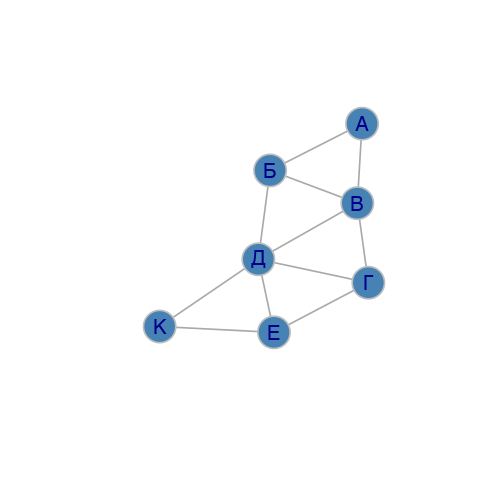

In [28]:
options(warn = -1,repr.plot.width=4,repr.plot.height=4)
edges <- c('А','Б', 'А','В', 'Б','В', 'Б','Д',
           'В','Г', 'В','Д', 'Г','Д', 'Г','Е',
           'Д','Е', 'Д','К', 'Е','К')

g <- graph(edges, directed=FALSE)
plot(g,vertex.color="steelblue", vertex.size=30, vertex.frame.color="gray")

- Только один узел имеет 5 ребер => Д == П5.
- Только один узел имеет 4 ребра => В == П3.
- А - один из узлов с 2 ребрами и А <-> В => А == П1.
- Б - один из узлов с 3 ребрами и Б <-> А, Б <-> В => Б == П2.
- Г - один из узлов с 3 ребрами и Г <-> В => Г == П4.
- Е - оставшийся узел с 3 ребрами => Е == Π6.
- К == П7.

---

- Only one node has 5 edges => Д == П5.
- Only one node has 4 edges => В == П3.
- А is one of the nodes with 2 edges and А <-> В => А == П1.
- Б is one of the nodes with 3 edges and Б <-> А, Б <-> В => Б == П2.
- Γ is one of the nodes with 3 edges and Г <-> В => Г == П4.
- Е is the remaining node with 3 edges => Е == Π6.
- К == П7.

| &#x123CF; | П1=А | П2=Б | П3=В | П4=Г | П5=Д | П6=Е | П7=К |
|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| **П1=А** | &#x123CF; | 40 | 50 | |  |  | |
| **П2=Б** | 40 | &#x123CF; | 15 |  | 60 |  |  |
| **П3=В** | 50 | 15 | &#x123CF; | 25 | 30 |  |  |
| **П4=Г** |  |  | 25 | &#x123CF; | 70 | 20 |  |
| **П5=Д** |  | 60 | 30 | 70 | &#x123CF; | 35 | 45 |
| **П6=Е** |  |  |  | 20 | 35 | &#x123CF; | 55 |
| **П7=К** |  |  |  |  | 45 | 55 | &#x123CF; |

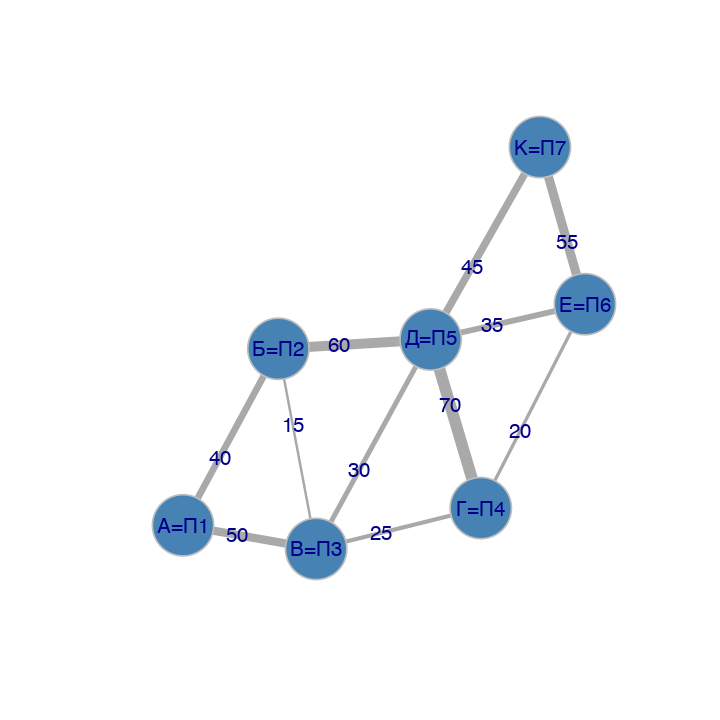

In [31]:
options(warn = -1,repr.plot.width=6,repr.plot.height=6)
edges <- c('А=П1','Б=П2', 'А=П1','В=П3', 'Б=П2','В=П3', 'Б=П2','Д=П5',
           'В=П3','Г=П4', 'В=П3','Д=П5', 'Г=П4','Д=П5', 'Г=П4','Е=П6',
           'Д=П5','Е=П6', 'Д=П5','К=П7', 'Е=П6','К=П7')
weights <- c(40,50,15,60,25,30,70,20,35,45,55)

g <- graph(edges, directed=FALSE)%>%
    set_edge_attr("weight", value=weights)
plot(g,
     vertex.color="steelblue",vertex.size=30,vertex.frame.color="gray",
     edge.label=E(g)$weight,edge.width=E(g)$weight/10)

In [32]:
g['В=П3']['Д=П5']

Д=П5 
  30

In [33]:
answer_dictionary[3] <- toString(g['В=П3']['Д=П5'])

## 4.
Для групповых операций с файлами используются маски имён файлов. 

Маска представляет собой последовательность букв, цифр и прочих допустимых в именах файлов символов, в которой также могут встречаться следующие символы.

Символ $«?»$ (вопросительный знак) означает ровно один произвольный символ.

Символ $«*»$ (звёздочка) означает любую последовательность символов произвольной длины, в том числе $«*»$ может задавать и пустую последовательность.

В каталоге находятся шесть файлов. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Ниже представлено восемь масок. 

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

Сколько из них таких, которым соответствует ровно три файла из данного каталога?

---

For group operations with files, file name masks are used. 

A mask is a sequence of letters, numbers and other permissible characters in file names, in which the following characters can also occur.

The symbol $?$ (question mark) means exactly one arbitrary character.

The symbol $*$ (asterisk) stands for any sequence of characters of arbitrary length, including $*$, which can also specify an empty sequence.

There are six files in the directory. 

`ask.c`, `kasko.cpp`, `kraska.doc`, `nebraska.docx`, `mask.pic`, `laska.dpr`

Here are eight masks.

`*?sk*.???*`, `*a*k*.*c*`, `*ask?.*c*`, `*ask*.??c*`, `*a??a*.??c*`, `*.??*`,'`*ka*.?*?`, `*sk*.d*`

How many of them are those to which exactly three files from this catalog correspond?

In [35]:
file_list <- c('ask.c', 'kasko.cpp', 'kraska.doc', 
               'nebraska.docx', 'mask.pic', 'laska.dpr')
mask_list <- c('?ask*.???*', '*ask*.*c*', '*as??.*c*', '*ask*.???',
               '*a*a*.*d*', '*aska*.?*?', '?????*.???', '?s*k?.*')

df <- data.frame(file_list=file_list,
                 mask_1=grepl("^.*.sk.*\\.....*$",file_list), 
                 mask_2=grepl("^.*a.*k.*\\..*c.*$", file_list), 
                 mask_3=grepl("^.*ask.\\..*c.*$", file_list), 
                 mask_4=grepl("^.*ask.*\\...c.*$", file_list),
                 mask_5=grepl("^.*a..a.*\\...c.*$",file_list), 
                 mask_6=grepl("^.*\\....*$", file_list), 
                 mask_7=grepl("^.*ka.*\\...*.$", file_list), 
                 mask_8=grepl("^.*sk.*\\.d.*$", file_list))
df 

file_list,mask_1,mask_2,mask_3,mask_4,mask_5,mask_6,mask_7,mask_8
ask.c,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
kasko.cpp,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE
kraska.doc,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
nebraska.docx,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
mask.pic,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
laska.dpr,TRUE,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,TRUE


In [36]:
c <- 0
for (i in 2:9) {
    print(mask_list[i-1]); 
    print(length(df[1:6,i][df[1:6,i]==TRUE]))
    if (length(df[1:6,i][df[1:6,i]==TRUE]) == 3) {c <- c + 1}
}

c

[1] "?ask*.???*"
[1] 5
[1] "*ask*.*c*"
[1] 5
[1] "*as??.*c*"
[1] 3
[1] "*ask*.???"
[1] 3
[1] "*a*a*.*d*"
[1] 2
[1] "*aska*.?*?"
[1] 5
[1] "?????*.???"
[1] 4
[1] "?s*k?.*"
[1] 3


[1] 3

In [37]:
answer_dictionary[4] <- toString(c)

## 5.
Для кодирования некоторой последовательности, состоящей из букв А, Б, В, Г и Д, используется неравномерный двоичный код, 

позволяющий однозначно декодировать полученную двоичную последовательность. 

Вот этот код: `А-110`, `Б-10`, `В-01`, `Г-111`. 

Каким кодовым словом должна кодироваться буква Д? 

Если таких вариантов несколько, укажите самый короткий.

---

To encode a sequence consisting of the letters А, Б, В, Г and Д, an unequal binary code is used, 

which uniquely decodes the resulting binary sequence.

Here is the code: `А-110`, `Б-10`, `В-01`, `Г-111`.

What code word should be used for encoding the letter Д? 

If there are several possible variants, specify the shortest one.

В решении использован Алгоритм Шеннона — Фано.

1) Самые короткие коды 0 и 1 не могут быть использованы - с них уже начинаются другие кодовые слова.

2) Следующая бинарная комбинация - из двух цифр. В начале кодовых слов уже встречаются 01, 10 и 11, но нет 00. 

Этим самым коротким из возможных сочетаний и можно закодировать Д.

---

The solution uses the Shannon-Fano Algorithm.

1) The shortest codes 0 and 1 cannot be used - other code words already begin with them.

2) The next binary combination is two-digital. At the beginning of the code words, there are already 01, 10 and 11, but no 00. 

This shortest possible combination can be used for encoding D.

In [39]:
answer_dictionary[5] <- '00'

## 6.
Автомат получает на вход два двузначных шестнадцатеричных числа. 

В этих числах все цифры не превосходят цифру 7 (если в числе есть цифра больше 7, автомат отказывается работать). 

По этим числам строится новое шестнадцатеричное число по следующим правилам.

1. Вычисляются два шестнадцатеричных числа — сумма старших разрядов полученных чисел и сумма младших разрядов этих чисел.

2. Полученные два шестнадцатеричных числа записываются друг за другом в порядке возрастания (без разделителей).

*Пример*. Исходные числа: 52, 66. Поразрядные суммы: В, 8. Результат: 8В.

Какие из предложенных чисел могут быть результатом работы автомата?

Перечислите в алфавитном порядке буквы, соответствующие этим числам, без пробелов и знаков препинания.

**A) 18 B) 2F C) 214 D) 7Е E) В7**

---

The machine receives two two-digit hexadecimal numbers. 

In these numbers, all figures do not exceed 7 (if there is a figure greater than 7 in the number, the machine refuses to work). 

For these numbers, a new hexadecimal number is constructed according to the following rules.

1. Two hexadecimal numbers are calculated - the sum of the highest digits of the obtained numbers and the sum of the lower digits of these numbers.

2. The received two hexadecimal numbers are written one after the other in ascending order (without separators).

*Example*. Original numbers: 52, 66. Bitwise sums: B, 8. Result: 8B.

Which of the suggested numbers can be the result of the operation of this machine?

List the letters in the alphabetical order corresponding to these numbers, without spaces and punctuation marks.

**A) 18 B) 2F C) 214 D) 7E E) B7**

**A) 18**

- Возможный вариант сложения и перестановки цифр:  $20_{16}$ и $61_{16}$  поразрядно суммируются и получается пара $8_{16}, 1_{16}$, затем цифры переставляются $18_{16}$.


**B) 2F**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат сложения разрядов не может быть $15_{10} (F_{16})$.

**C) 214**

- Цифры складываемых чисел не превышают $7_{10} (7_{16})$  => их поразрядные суммы не превышают  $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => результат не может быть трехзначным в шестнадцатеричной системе.

**D) 7E**

- Возможный вариант сложения и перестановки цифр:  $73_{16}$ и $74_{16}$  поразрядно суммируются и получается пара $E_{16}, 7_{16}$, затем цифры переставляются $7E_{16}$.

**E) B7**

- Цифры расположены в порядке убывания => число не может быть результатом работы автомата.

---

**A) 18**

- The possible variant of adding and rearranging the numbers:  $20_{16}$ and $61_{16}$ are digitally summed and the pair $8_{16}, 1_{16}$ , is obtained, then the digits are rearranged $18_{16}$.

**B) 2F**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be a three-digit number in the hexadecimal system.

**C) 214**

- The figures do not exceed $7_{10} (7_{16})$  => their bitwise sums do not exceed $7_{10}+7_{10}=14_{10} (7_{16}+7_{16}=E_{16})$ => the result cannot be $15_{10} (F_{16})$.

**D) 7E**

- The possible variant of adding and rearranging the numbers:  $73_{16}$ and $74_{16}$ are digitally summed and the pair $E_{16}, 7_{16}$ , is obtained, then the digits are rearranged $7E_{16}$.

**E) B7**

- The digits are arranged in descending order => the number cannot be the result of the operation of this machine.

In [42]:
answer_dictionary[6] <- 'AD'

## 7.
В электронной таблице значение формулы `=СРЗНАЧ (С2:D5)` равно 3. 

Чему равно значение формулы `=СУММ (С5:D5)`, если значение формулы `=СРЗНАЧ (С2:D4)` равно 5?

---

In the spreadsheet, the value of the formula `=AVERAGE (C2: D5)` is 3. 

What is the value of the formula `=SUM (C5: D5)` if the value of the formula `=AVERAGE (C2: D4)` is 5?

<div style="width: 600px; height: 300px; overflow:auto;">
    <img src="it_images/2017_03_07a.png" width="600" height="300"/>
</div>
[Google Sheet](https://drive.google.com/open?id=19XfRvVOsEYj-HA7S4vQ3WeW3JOu-N-X8Hdp0oi7LW_o)

In [44]:
# (C2+C3+C4+C5+D2+D3+D4+D5)/8 = 3 <=> C2+C3+C4+C5+D2+D3+D4+D5 = 24
# (C2+C3+C4+D2+D3+D4)/6 = 5 <=> C2+C3+C4+D2+D3+D4 = 30
# C5+D5=C2+C3+C4+C5+D2+D3+D4+D5 - (C2+C3+C4+D2+D3+D4) = 24-30 = -6
answer_dictionary[7] <- toString(8 * 3 - 6 * 5)   

## 8.
Определите, что будет напечатано в результате выполнения следующего фрагмента программы.

<table style="width:95%;">
  <tr style="color:slategray;font-size:120%;font-family:'Roboto';">
    <th style="text-align:center;">Python</th> 
    <th style="text-align:center;">R</th>          
  </tr>
  <tr>
    <td style="font-weight:bold;text-align:left;"><pre><code class='python'>
k,s = 1,8

while s < 208:
    s += 20
    k &#42;= 2
    
print(k)
    </code></pre></td> 
    <td style="font-weight:bold;text-align:left;"><pre><code class='r'> 

k <- 1; s <- 8

while (s < 208){
    s <- s + 20
    k <- k &#42; 2
}

print(k)
    </code></pre></td>     
  </tr>    
</table>

Determine what will be printed as a result of the next program fragment.

In [46]:
k <- 1; s <- 8
while (s < 208){
    s <- s + 20
    k <- k * 2
}
print(k)

[1] 1024


In [48]:
answer_dictionary[8] <- toString(k)

## 9.

## 10.

## 11.

## 12.

## 13.

## 14.

## 15.

## 16.

## 17.

## 18.

## 19.

## 20.

## 21.

## 22.

## 23.

## Часть 2 &nbsp; &nbsp; &nbsp; Part 2

## 24.

## 25.

## 26.

## 27.

## Ответы &nbsp; &nbsp; &nbsp; Answers

In [49]:
answer_dictionary

<hash> containing 8 key-value pair(s).
  1 : 6
  2 : 45
  3 : 30
  4 : 3
  5 : 00
  6 : AD
  7 : -6
  8 : 1024